In [1]:
import pandas as pd

file_path = 'prosperLoanData.csv' 
loan_data_1 = pd.read_csv(file_path)
loan_data_1.head()


loan_data_1['ListingCreationDate'] = pd.to_datetime(loan_data_1['ListingCreationDate'],  format='mixed').dt.date
loan_data_1["ListingCreationDate"][101]

datetime.date(2007, 12, 23)

In [2]:
loan_data_1["ListingCreationDate"] = pd.to_datetime(loan_data_1["ListingCreationDate"])

last_date = loan_data_1["ListingCreationDate"].max()        # most recent date
first_date = loan_data_1["ListingCreationDate"].min()  
print("Most recent date:", last_date)
print("Earliest date:", first_date)

Most recent date: 2014-03-10 00:00:00
Earliest date: 2005-11-09 00:00:00


In [3]:

file_path = 'loan.csv' 
loan_data_2 = pd.read_csv(file_path)

C:\Users\Thisu\AppData\Local\Temp\ipykernel_4760\107489626.py:2: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_2 = pd.read_csv(file_path)


In [4]:
loan_data_2["issue_d"]
earliest_date_2 = loan_data_2["issue_d"].min()
print("Earliest date in loan_data_2:", earliest_date_2)
latest_date_2 = loan_data_2["issue_d"].max()
print("Latest date in loan_data_2:", latest_date_2)

Earliest date in loan_data_2: Apr-2008
Latest date in loan_data_2: Sep-2018


In [5]:
print(loan_data_2.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)


In [6]:
extract1 = loan_data_1[["ListingCreationDate", "LoanOriginalAmount", "Term", "BorrowerRate"]]
extract2 = loan_data_2[["issue_d", "loan_amnt", "term", "int_rate"]]
extract2['term'] = extract2['term'].astype(str).str[:3]
extract1["BorrowerRate"] = extract1["BorrowerRate"] * 100
extract2['issue_d'] = pd.to_datetime(extract2['issue_d'], format='%b-%Y')


C:\Users\Thisu\AppData\Local\Temp\ipykernel_4760\2746861243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extract2['term'] = extract2['term'].astype(str).str[:3]
C:\Users\Thisu\AppData\Local\Temp\ipykernel_4760\2746861243.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extract1["BorrowerRate"] = extract1["BorrowerRate"] * 100
C:\Users\Thisu\AppData\Local\Temp\ipykernel_4760\2746861243.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [7]:
extract2_rmd = extract2.rename(columns={'issue_d':'ListingCreationDate', 'loan_amnt':'LoanOriginalAmount', 'term':'Term', 'int_rate':'BorrowerRate'})
combined = pd.concat([extract1, extract2_rmd], ignore_index=True)
print(combined.head())

  ListingCreationDate  LoanOriginalAmount Term  BorrowerRate
0          2007-08-26                9425   36         15.80
1          2014-02-27               10000   36          9.20
2          2007-01-05                3001   36         27.50
3          2012-10-22               10000   36          9.74
4          2013-09-14               15000   36         20.85


In [8]:
combined = combined.sort_values(by='ListingCreationDate').reset_index(drop=True)
print(combined.head(100))

   ListingCreationDate  LoanOriginalAmount Term  BorrowerRate
0           2005-11-09                1000   36          4.00
1           2005-11-11                1500   36          5.95
2           2005-11-15                1000   36         17.00
3           2005-11-15                1000   36          4.35
4           2005-11-18                5000   36          8.50
..                 ...                 ...  ...           ...
95          2006-02-21                7000   36         11.70
96          2006-02-21               22000   36         11.00
97          2006-02-21               12130   36         11.50
98          2006-02-21                5000   36          7.12
99          2006-02-21                3300   36         24.00

[100 rows x 4 columns]


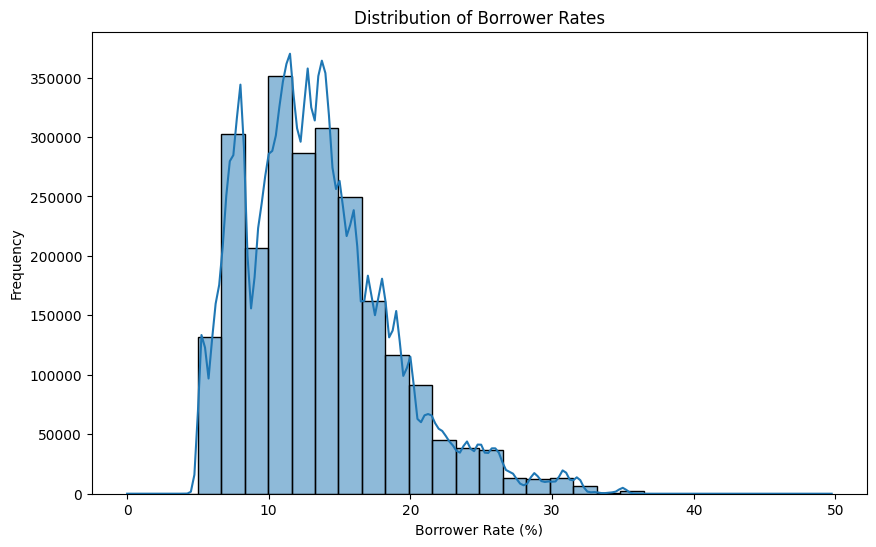

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(10, 6))
sns.histplot(combined['BorrowerRate'], bins=30, kde=True)
plt.title('Distribution of Borrower Rates')
plt.xlabel('Borrower Rate (%)')
plt.ylabel('Frequency')
plt.show()  

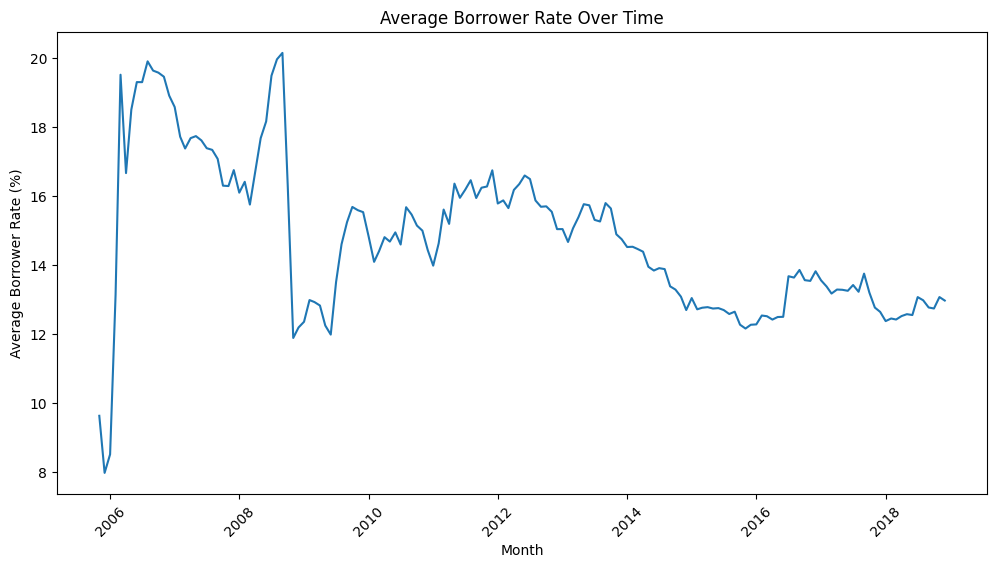

In [10]:
# Ensure datetime
combined['ListingCreationDate'] = pd.to_datetime(combined['ListingCreationDate'])

# Extract month-year
combined['month'] = combined['ListingCreationDate'].dt.to_period('M')

# Group & average
monthly_avg = combined.groupby('month')['BorrowerRate'].mean().reset_index()

# Convert back to datetime for plotting
monthly_avg['month'] = monthly_avg['month'].dt.to_timestamp()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='month', y='BorrowerRate')
plt.title('Average Borrower Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Average Borrower Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [11]:
cmbd_earliest_date = combined["ListingCreationDate"].min()
cmbd_latest_date = combined["ListingCreationDate"].max()
print("Earliest date in combined dataset:", cmbd_earliest_date)
print("Latest date in combined dataset:", cmbd_latest_date)

Earliest date in combined dataset: 2005-11-09 00:00:00
Latest date in combined dataset: 2018-12-01 00:00:00


In [12]:
file_path_t3 = 'TB3MS.csv'
tb3ms_data = pd.read_csv(file_path_t3)
tb3ms_data['observation_date'] = pd.to_datetime(tb3ms_data['observation_date'])
tb3ms_data.head()
file_path_t4 = 'TB4WK.csv'
tb4wk_data = pd.read_csv(file_path_t4)
tb4wk_data['observation_date'] = pd.to_datetime(tb4wk_data['observation_date'])
tb4wk_data.head()

,observation_date,TB4WK
0,2005-11-01,3.84
1,2005-12-01,3.61
2,2006-01-01,4.03
3,2006-02-01,4.31
4,2006-03-01,4.47


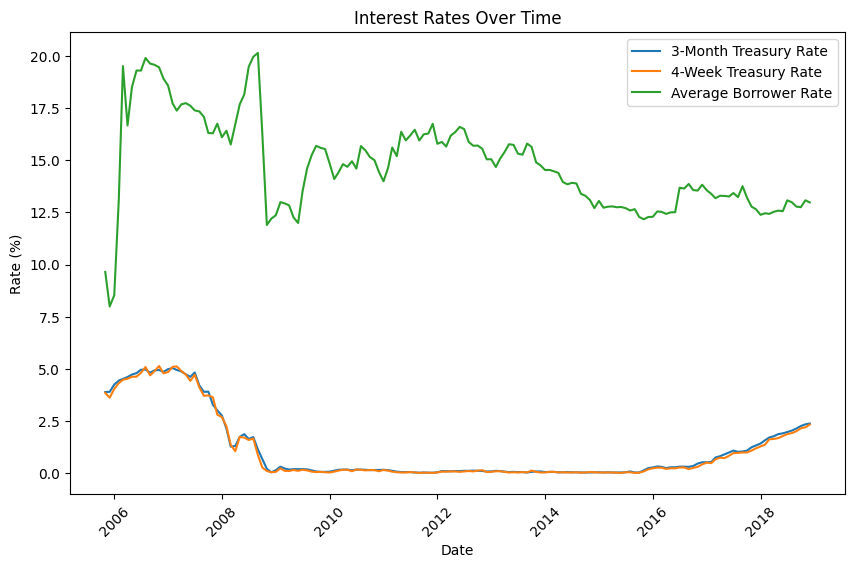

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=tb3ms_data, x='observation_date', y='TB3MS', label='3-Month Treasury Rate')
sns.lineplot(data=tb4wk_data, x='observation_date', y='TB4WK', label='4-Week Treasury Rate')
sns.lineplot(data=monthly_avg, x='month', y='BorrowerRate', label='Average Borrower Rate')
plt.title('Interest Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [14]:
# Rename columns for clarity if needed
tb4wk_data['month'] = pd.to_datetime(tb4wk_data['observation_date'])  # adjust col name
tb3ms_data['month'] = pd.to_datetime(tb3ms_data['observation_date'])

# Rename rate columns
tb4wk_data = tb4wk_data.rename(columns={'TB4WK': 'Tbill_4wk'})  # adjust
tb3ms_data = tb3ms_data.rename(columns={'TB3MS': 'Tbill_3mo'})
monthly_avg = monthly_avg.rename(columns={'BorrowerRate': 'BorrowerRate'})
print(tb4wk_data.head())
print(tb3ms_data.head())
# Merge all on month
merged = monthly_avg.merge(tb4wk_data[['month', 'Tbill_4wk']], on='month', how='inner') \
                 .merge(tb3ms_data[['month', 'Tbill_3mo']], on='month', how='inner')


  observation_date  Tbill_4wk      month
0       2005-11-01       3.84 2005-11-01
1       2005-12-01       3.61 2005-12-01
2       2006-01-01       4.03 2006-01-01
3       2006-02-01       4.31 2006-02-01
4       2006-03-01       4.47 2006-03-01
  observation_date  Tbill_3mo      month
0       2005-11-01       3.88 2005-11-01
1       2005-12-01       3.89 2005-12-01
2       2006-01-01       4.24 2006-01-01
3       2006-02-01       4.43 2006-02-01
4       2006-03-01       4.51 2006-03-01


       month  BorrowerRate
0 2009-04-01     18.658571
1 2009-05-01     12.257319
2 2009-06-01     11.994384
3 2009-07-01     13.514122
4 2009-08-01     14.611815


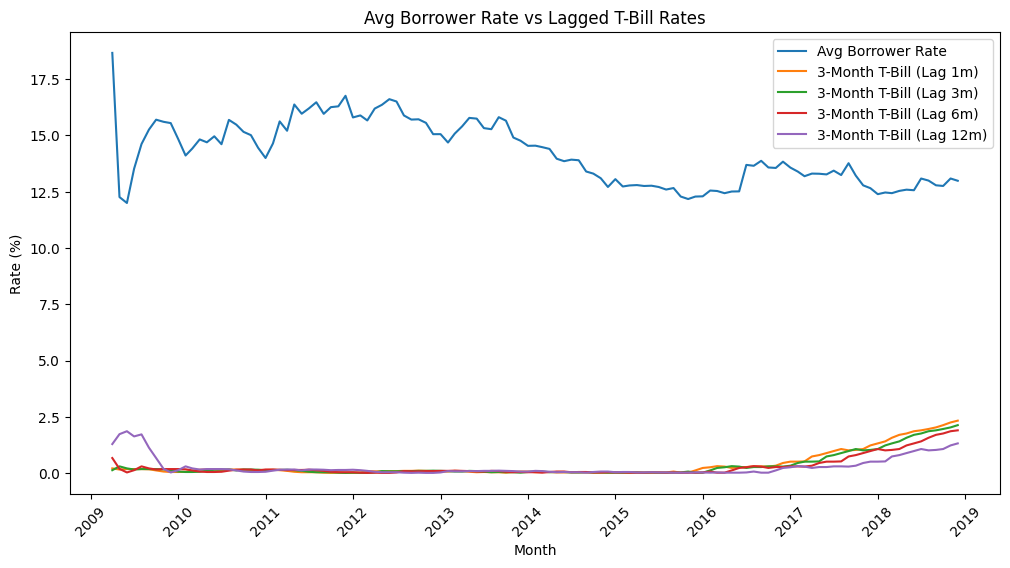

In [15]:
lag_extract2 = extract2[extract2['issue_d'] > '2009-04-01']
lag_extract2 = lag_extract2.rename(columns={'issue_d':'ListingCreationDate', 'loan_amnt':'LoanOriginalAmount', 'term':'Term', 'int_rate':'BorrowerRate'})
lag_extract1 = extract1[extract1['ListingCreationDate'] > '2009-04-01']
combined_lag = pd.concat([lag_extract1, lag_extract2], ignore_index=True)
combined_lag = combined_lag.sort_values(by='ListingCreationDate').reset_index(drop=True)    

# Extract month-year
combined_lag['month'] = combined_lag['ListingCreationDate'].dt.to_period('M')

# Group & average
monthly_avg_lag = combined_lag.groupby('month')['BorrowerRate'].mean().reset_index()

# Convert back to datetime for plotting
monthly_avg_lag['month'] = monthly_avg_lag['month'].dt.to_timestamp()

print(monthly_avg_lag.head())
#Create a running average T-bill rate corresponding to a month before the borrower rate
tb3ms_data['month'] = tb3ms_data['observation_date'].dt.to_period('M')
tb3ms_data['month'] = tb3ms_data['month'].dt.to_timestamp()
tb3ms_data['Tbill_3mo_lag'] = tb3ms_data['Tbill_3mo'].shift(1)  # Lag by 1 month
#add lags for 3 months before
tb3ms_data['Tbill_3mo_lag_3m'] = tb3ms_data['Tbill_3mo'].shift(3)  # Lag by 3 months
#add lags for 6 months before
tb3ms_data['Tbill_3mo_lag_6m'] = tb3ms_data['Tbill_3mo'].shift(6)  # Lag by 6 months
#add lags for 12 months before
tb3ms_data['Tbill_3mo_lag_12m'] = tb3ms_data['Tbill_3mo'].shift(12)  # Lag by 12 months
# Merge with monthly_avg_lag
merged_lag = monthly_avg_lag.merge(tb3ms_data[['month', 'Tbill_3mo_lag', 'Tbill_3mo_lag_3m', 'Tbill_3mo_lag_6m', 'Tbill_3mo_lag_12m']], on='month', how='inner')
# Calculate correlations for each lag
correlations = merged_lag[['BorrowerRate', 'Tbill_3mo_lag', 'Tbill_3mo_lag_3m', 'Tbill_3mo_lag_6m', 'Tbill_3mo_lag_12m']].corr()['BorrowerRate'].drop('BorrowerRate')
#plot lines
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_lag, x='month', y='BorrowerRate', label='Avg Borrower Rate')
sns.lineplot(data=merged_lag, x='month', y='Tbill_3mo_lag', label='3-Month T-Bill (Lag 1m)')
sns.lineplot(data=merged_lag, x='month', y='Tbill_3mo_lag_3m', label='3-Month T-Bill (Lag 3m)')
sns.lineplot(data=merged_lag, x='month', y='Tbill_3mo_lag_6m', label='3-Month T-Bill (Lag 6m)')
sns.lineplot(data=merged_lag, x='month', y='Tbill_3mo_lag_12m', label='3-Month T-Bill (Lag 12m)')
plt.title('Avg Borrower Rate vs Lagged T-Bill Rates')
plt.xlabel('Month')
plt.ylabel('Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Tbill_3mo_lag       -0.446672
Tbill_3mo_lag_3m    -0.430451
Tbill_3mo_lag_6m    -0.351149
Tbill_3mo_lag_12m   -0.215663
Name: BorrowerRate, dtype: float64


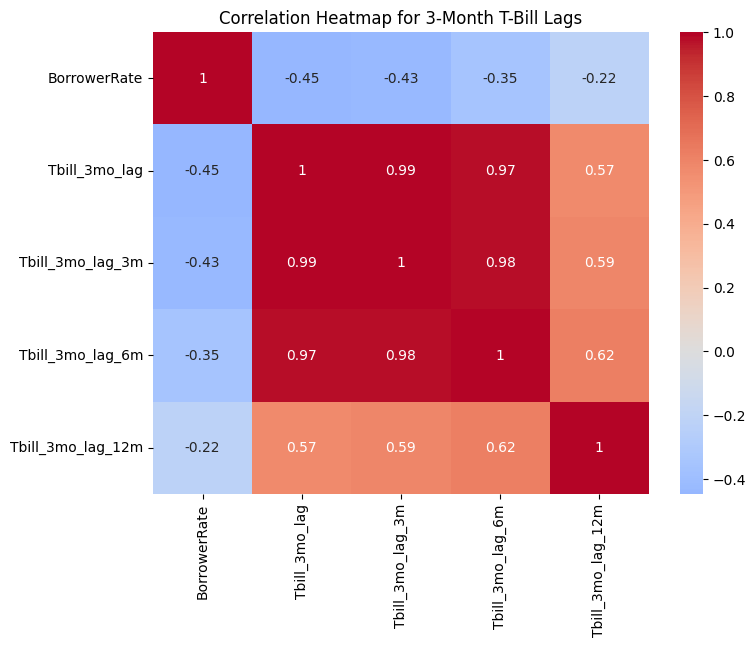

In [16]:
print(correlations)
#Correlation Heat Maps for 3 month T-bill lags
correlation_matrix_3mo = merged_lag[['BorrowerRate', 'Tbill_3mo_lag', 'Tbill_3mo_lag_3m', 'Tbill_3mo_lag_6m', 'Tbill_3mo_lag_12m']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_3mo, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for 3-Month T-Bill Lags')
plt.show()

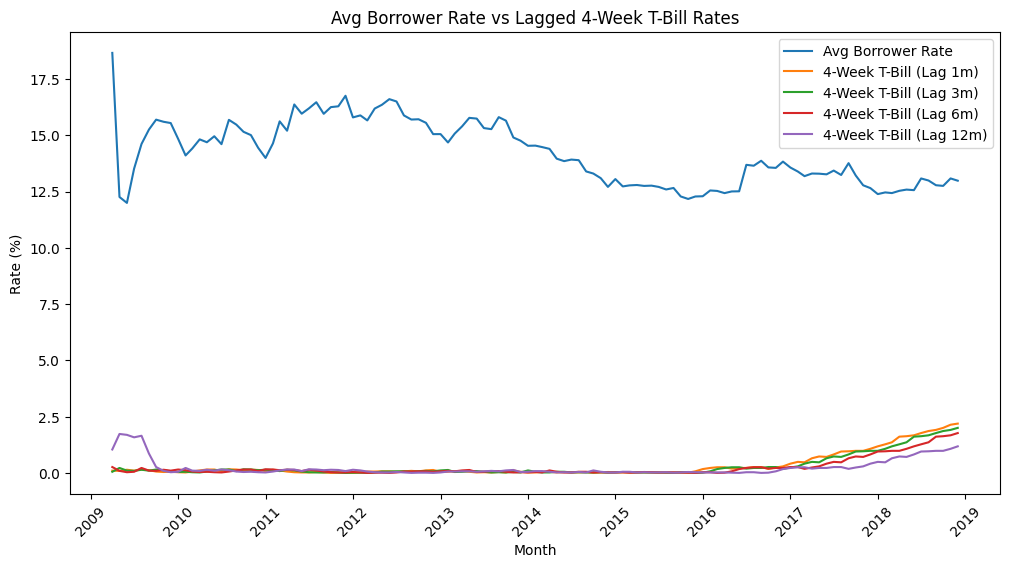

In [17]:
#Repeat for 4week t-bill
tb4wk_data['month'] = tb4wk_data['observation_date'].dt.to_period('M')
tb4wk_data['month'] = tb4wk_data['month'].dt.to_timestamp()
tb4wk_data['Tbill_4wk_lag'] = tb4wk_data['Tbill_4wk'].shift(1)  # Lag by 1 month
tb4wk_data['Tbill_4wk_lag_3m'] = tb4wk_data['Tbill_4wk'].shift(3)  # Lag by 3 months
tb4wk_data['Tbill_4wk_lag_6m'] = tb4wk_data['Tbill_4wk'].shift(6)  # Lag by 6 months
tb4wk_data['Tbill_4wk_lag_12m'] = tb4wk_data['Tbill_4wk'].shift(12)  # Lag by 12 months
# Merge with monthly_avg_lag
merged_lag_4wk = monthly_avg_lag.merge(tb4wk_data[['month', 'Tbill_4wk_lag', 'Tbill_4wk_lag_3m', 'Tbill_4wk_lag_6m', 'Tbill_4wk_lag_12m']], on='month', how='inner')
# Calculate correlations for each lag
correlations_4wk = merged_lag_4wk[['BorrowerRate', 'Tbill_4wk_lag', 'Tbill_4wk_lag_3m', 'Tbill_4wk_lag_6m', 'Tbill_4wk_lag_12m']].corr()['BorrowerRate'].drop('BorrowerRate')
#plot lines
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_lag_4wk, x='month', y='BorrowerRate', label='Avg Borrower Rate')
sns.lineplot(data=merged_lag_4wk, x='month', y='Tbill_4wk_lag', label='4-Week T-Bill (Lag 1m)')
sns.lineplot(data=merged_lag_4wk, x='month', y='Tbill_4wk_lag_3m', label='4-Week T-Bill (Lag 3m)')
sns.lineplot(data=merged_lag_4wk, x='month', y='Tbill_4wk_lag_6m', label='4-Week T-Bill (Lag 6m)')
sns.lineplot(data=merged_lag_4wk, x='month', y='Tbill_4wk_lag_12m', label='4-Week T-Bill (Lag 12m)')
plt.title('Avg Borrower Rate vs Lagged 4-Week T-Bill Rates')
plt.xlabel('Month')
plt.ylabel('Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

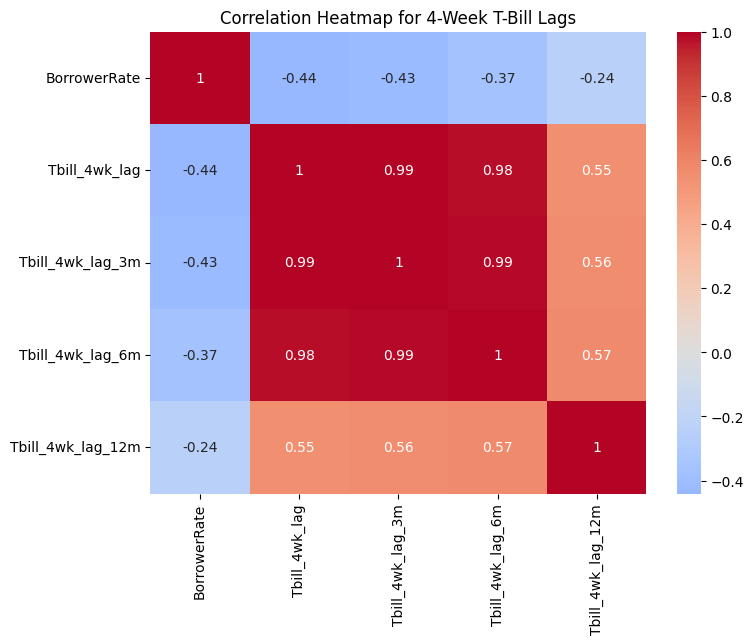

In [18]:
#Correlation Heat Maps
correlation_matrix_4wk = merged_lag_4wk[['BorrowerRate', 'Tbill_4wk_lag', 'Tbill_4wk_lag_3m', 'Tbill_4wk_lag_6m', 'Tbill_4wk_lag_12m']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_4wk, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for 4-Week T-Bill Lags')
plt.show()

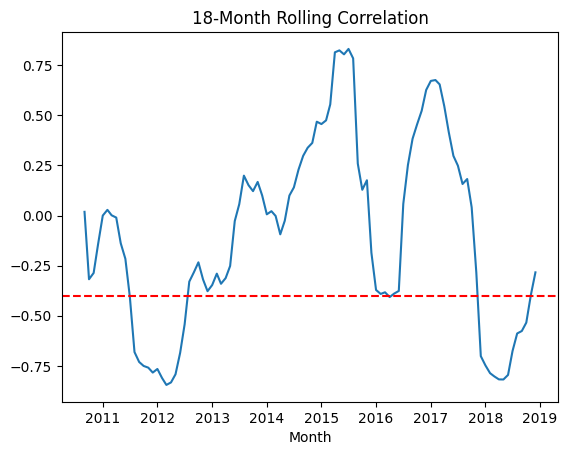

In [19]:
#Compute rolling correlation with lagged 3 month T-bill
merged_lag['rolling_corr'] = merged_lag['BorrowerRate'].rolling(18).corr(merged_lag['Tbill_3mo_lag'])
plt.plot(merged_lag['month'], merged_lag['rolling_corr'])
plt.title('18-Month Rolling Correlation')
plt.xlabel('Month')
plt.axhline(-.4, color='r', linestyle='--')  # Good threshold
plt.show()

In [20]:
#ADF test for stationarity
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(merged_lag['BorrowerRate'].dropna())
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])


ADF Statistic: -3.809967984195154
p-value: 0.0028069602495758295


In [21]:
import numpy as np
#ADF test for stationarity on lagged T-bill
adf_result_tbill = adfuller(merged_lag['Tbill_3mo_lag'].dropna())
print('ADF Statistic for T-bill:', adf_result_tbill[0])
print('p-value for T-bill:', adf_result_tbill[1])

#Calculate log difference on T-bill to try to achieve stationarity
merged_lag['Tbill_3mo_log_diff'] = np.log(merged_lag['Tbill_3mo_lag']) - np.log(merged_lag['Tbill_3mo_lag'].shift(1))
adf_result_log_diff = adfuller(merged_lag['Tbill_3mo_log_diff'].dropna())
print('ADF Statistic for T-bill log diff:', adf_result_log_diff[0])
print('p-value for T-bill log diff:', adf_result_log_diff[1])

#do the same to borrower rate
merged_lag['BorrowerRate_log_diff'] = np.log(merged_lag['BorrowerRate']) - np.log(merged_lag['BorrowerRate'].shift(1))
adf_result_borrower_log_diff = adfuller(merged_lag['BorrowerRate_log_diff'].dropna())
print('ADF Statistic for Borrower Rate log diff:', adf_result_borrower_log_diff[0])
print('p-value for Borrower Rate log diff:', adf_result_borrower_log_diff[1])

ADF Statistic for T-bill: 4.4991957258436335
p-value for T-bill: 1.0
ADF Statistic for T-bill log diff: -8.977195150957622
p-value for T-bill log diff: 7.476513584713827e-15
ADF Statistic for Borrower Rate log diff: -17.12521195629651
p-value for Borrower Rate log diff: 7.211368733175253e-30


Tbill_3mo_log_diff        0.068566
Tbill_3mo_log_diff_3m    -0.163985
Tbill_3mo_log_diff_6m     0.327250
Tbill_3mo_log_diff_12m   -0.078560
Name: BorrowerRate_log_diff, dtype: float64


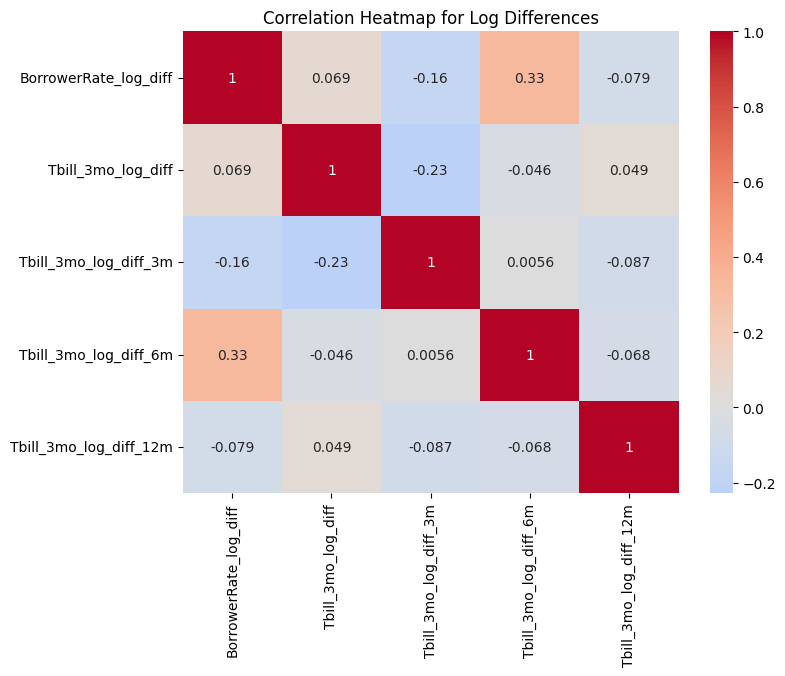

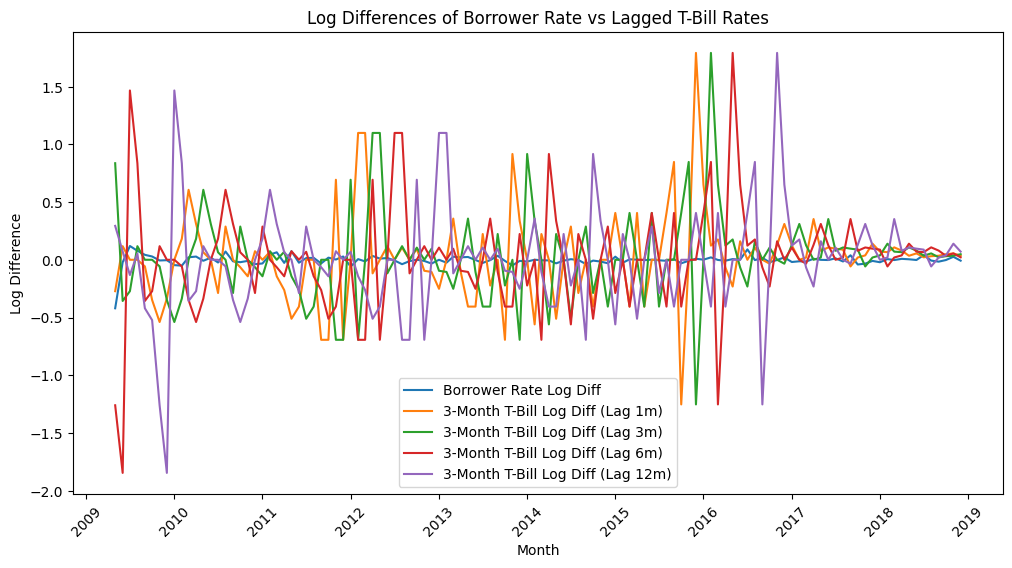

In [22]:
#Compute log differences for 3, 6, and 12 month lags of T-bill
merged_lag['Tbill_3mo_log_diff_3m'] = np.log(merged_lag['Tbill_3mo_lag_3m']) - np.log(merged_lag['Tbill_3mo_lag_3m'].shift(1))
merged_lag['Tbill_3mo_log_diff_6m'] = np.log(merged_lag['Tbill_3mo_lag_6m']) - np.log(merged_lag['Tbill_3mo_lag_6m'].shift(1))
merged_lag['Tbill_3mo_log_diff_12m'] = np.log(merged_lag['Tbill_3mo_lag_12m']) - np.log(merged_lag['Tbill_3mo_lag_12m'].shift(1))

#Now complete correlation analysis on log differences on 1 month, 3 month, 6 month, and 12 month lags of T-bill
correlations_log_diff = merged_lag[['BorrowerRate_log_diff', 'Tbill_3mo_log_diff', 'Tbill_3mo_log_diff_3m', 'Tbill_3mo_log_diff_6m', 'Tbill_3mo_log_diff_12m']].corr()['BorrowerRate_log_diff'].drop('BorrowerRate_log_diff')
print(correlations_log_diff)
#heatmap for log difference correlations
correlation_matrix_log_diff = merged_lag[['BorrowerRate_log_diff', 'Tbill_3mo_log_diff', 'Tbill_3mo_log_diff_3m', 'Tbill_3mo_log_diff_6m', 'Tbill_3mo_log_diff_12m']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_log_diff, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Log Differences')
plt.show()

#Lines for log differences
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_lag, x='month', y='BorrowerRate_log_diff', label='Borrower Rate Log Diff')
sns.lineplot(data=merged_lag, x='month', y='Tbill_3mo_log_diff', label='3-Month T-Bill Log Diff (Lag 1m)')
sns.lineplot(data=merged_lag, x='month', y='Tbill_3mo_log_diff_3m', label='3-Month T-Bill Log Diff (Lag 3m)')
sns.lineplot(data=merged_lag, x='month', y='Tbill_3mo_log_diff_6m', label='3-Month T-Bill Log Diff (Lag 6m)')
sns.lineplot(data=merged_lag, x='month', y='Tbill_3mo_log_diff_12m', label='3-Month T-Bill Log Diff (Lag 12m)')
plt.title('Log Differences of Borrower Rate vs Lagged T-Bill Rates')
plt.xlabel('Month')
plt.ylabel('Log Difference')
plt.xticks(rotation=45)
plt.legend()
plt.show()

     month  LoanOriginalAmount  BorrowerRate
0  2009-04         3319.071429     18.658571
1  2009-05         9365.147453     12.257319
2  2009-06         8848.029557     11.994384
3  2009-07         7810.978041     13.514122
4  2009-08         7388.072848     14.611815
Tbill_3mo_log_diff        0.063382
Tbill_3mo_log_diff_3m    -0.168109
Tbill_3mo_log_diff_6m     0.332758
Tbill_3mo_log_diff_12m   -0.079963
Name: BorrowerRate_log_diff, dtype: float64


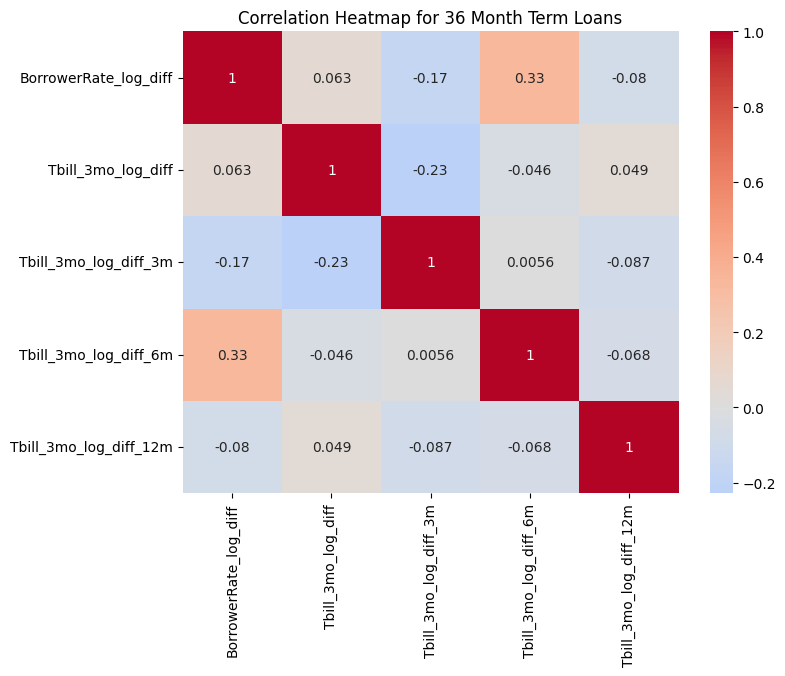

In [40]:
#Repeat for just 36 month term loans
lag_extract2_36 = extract2[(extract2['issue_d'] > '2009-04-01') & (extract2['term'] <= '36')]
lag_extract2_36 = lag_extract2_36.rename(columns={'issue_d':'ListingCreationDate', 'loan_amnt':'LoanOriginalAmount', 'term':'Term', 'int_rate':'BorrowerRate'})
lag_extract1_36 = extract1[(extract1['ListingCreationDate'] > '2009-04-01') & (extract1['Term'] <= 36)]
combined_lag_36 = pd.concat([lag_extract1_36, lag_extract2_36], ignore_index=True)
combined_lag_36 = combined_lag_36.sort_values(by='ListingCreationDate').reset_index(drop=True)
# Extract month-year
combined_lag_36['month'] = combined_lag_36['ListingCreationDate'].dt.to_period('M')
# Group & average
combined_lag_36_grouped = combined_lag_36.groupby('month').mean(numeric_only=True).reset_index()
print(combined_lag_36_grouped.head())

#log differences for 36 month term loans
combined_lag_36_grouped['BorrowerRate_log_diff'] = np.log(combined_lag_36_grouped['BorrowerRate']) - np.log(combined_lag_36_grouped['BorrowerRate'].shift(1))
combined_lag_36_grouped['Tbill_3mo_log_diff'] = np.log(merged_lag['Tbill_3mo_lag']) - np.log(merged_lag['Tbill_3mo_lag'].shift(1))
combined_lag_36_grouped['Tbill_3mo_log_diff_3m'] = np.log(merged_lag['Tbill_3mo_lag_3m']) - np.log(merged_lag['Tbill_3mo_lag_3m'].shift(1))
combined_lag_36_grouped['Tbill_3mo_log_diff_6m'] = np.log(merged_lag['Tbill_3mo_lag_6m']) - np.log(merged_lag['Tbill_3mo_lag_6m'].shift(1))
combined_lag_36_grouped['Tbill_3mo_log_diff_12m'] = np.log(merged_lag['Tbill_3mo_lag_12m']) - np.log(merged_lag['Tbill_3mo_lag_12m'].shift(1))
#Correlation for 36 month term loans
correlations_36 = combined_lag_36_grouped[['BorrowerRate_log_diff', 'Tbill_3mo_log_diff', 'Tbill_3mo_log_diff_3m', 'Tbill_3mo_log_diff_6m', 'Tbill_3mo_log_diff_12m']].corr()['BorrowerRate_log_diff'].drop('BorrowerRate_log_diff')
print(correlations_36)
#Heatmap for 36 month term loans
correlation_matrix_36 = combined_lag_36_grouped[['BorrowerRate_log_diff', 'Tbill_3mo_log_diff', 'Tbill_3mo_log_diff_3m', 'Tbill_3mo_log_diff_6m', 'Tbill_3mo_log_diff_12m']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_36, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for 36 Month Term Loans')
plt.show()

     month  LoanOriginalAmount  BorrowerRate
0  2010-07        15000.000000     16.400000
1  2010-10        15000.000000     14.160000
2  2010-11        14771.428571     15.078571
3  2010-12        15292.826087     15.058261
4  2011-01        16512.500000     15.300357
Tbill_3mo_log_diff        0.018871
Tbill_3mo_log_diff_3m    -0.086012
Tbill_3mo_log_diff_6m     0.050985
Tbill_3mo_log_diff_12m   -0.208946
Name: BorrowerRate_log_diff, dtype: float64


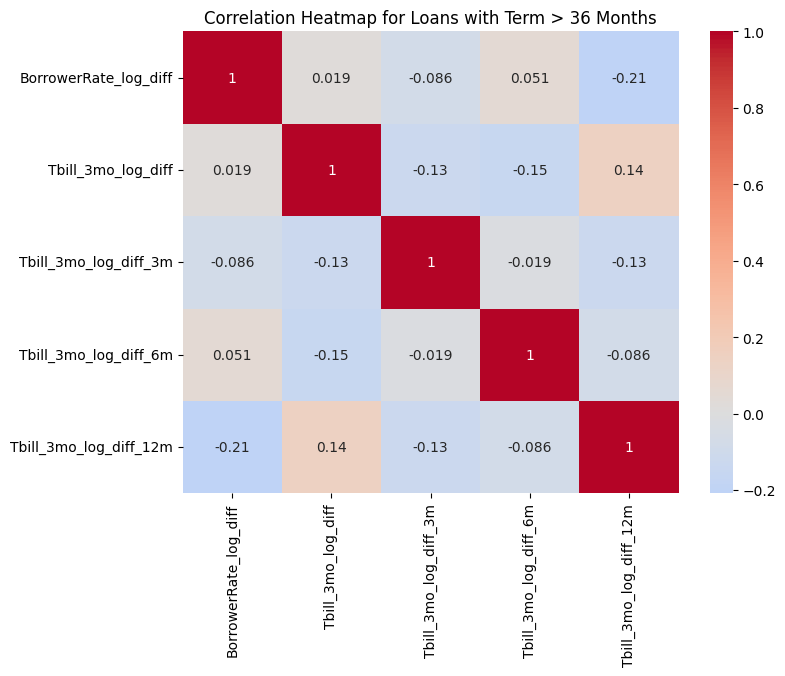

In [41]:
#Repeat for loans length greater than 36 months
lag_extract2_gt36 = extract2[(extract2['issue_d'] > '2009-04-01') & (extract2['term'] > '36')]
lag_extract2_gt36 = lag_extract2_gt36.rename(columns={'issue_d':'ListingCreationDate', 'loan_amnt':'LoanOriginalAmount', 'term':'Term', 'int_rate':'BorrowerRate'})
lag_extract1_gt36 = extract1[(extract1['ListingCreationDate'] > '2009-04-01') & (extract1['Term'] > 36)]
combined_lag_gt36 = pd.concat([lag_extract1_gt36, lag_extract2_gt36], ignore_index=True)
combined_lag_gt36 = combined_lag_gt36.sort_values(by='ListingCreationDate').reset_index(drop=True)
# Extract month-year
combined_lag_gt36['month'] = combined_lag_gt36['ListingCreationDate'].dt.to_period('M')
# Group & average
combined_lag_gt36_grouped = combined_lag_gt36.groupby('month').mean(numeric_only=True).reset_index()
print(combined_lag_gt36_grouped.head())
#log differences for greater than 36 month term loans
combined_lag_gt36_grouped['BorrowerRate_log_diff'] = np.log(combined_lag_gt36_grouped['BorrowerRate']) - np.log(combined_lag_gt36_grouped['BorrowerRate'].shift(1))
combined_lag_gt36_grouped['Tbill_3mo_log_diff'] = np.log(merged_lag['Tbill_3mo_lag']) - np.log(merged_lag['Tbill_3mo_lag'].shift(1))
combined_lag_gt36_grouped['Tbill_3mo_log_diff_3m'] = np.log(merged_lag['Tbill_3mo_lag_3m']) - np.log(merged_lag['Tbill_3mo_lag_3m'].shift(1))
combined_lag_gt36_grouped['Tbill_3mo_log_diff_6m'] = np.log(merged_lag['Tbill_3mo_lag_6m']) - np.log(merged_lag['Tbill_3mo_lag_6m'].shift(1))
combined_lag_gt36_grouped['Tbill_3mo_log_diff_12m'] = np.log(merged_lag['Tbill_3mo_lag_12m']) - np.log(merged_lag['Tbill_3mo_lag_12m'].shift(1))
#Correlation for greater than 36 month term loans
correlations_gt36 = combined_lag_gt36_grouped[['BorrowerRate_log_diff', 'Tbill_3mo_log_diff', 'Tbill_3mo_log_diff_3m', 'Tbill_3mo_log_diff_6m', 'Tbill_3mo_log_diff_12m']].corr()['BorrowerRate_log_diff'].drop('BorrowerRate_log_diff')
print(correlations_gt36)
#Heatmap for greater than 36 month term loans
correlation_matrix_gt36 = combined_lag_gt36_grouped[['BorrowerRate_log_diff', 'Tbill_3mo_log_diff', 'Tbill_3mo_log_diff_3m', 'Tbill_3mo_log_diff_6m', 'Tbill_3mo_log_diff_12m']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_gt36, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Loans with Term > 36 Months')
plt.show()

     month  LoanOriginalAmount  BorrowerRate
0  2009-04         2805.153846     18.940000
1  2009-05         5433.295455     12.073364
2  2009-06         5197.400000     11.793480
3  2009-07         4516.975124     13.917090
4  2009-08         4282.206439     15.419905
Tbill_3mo_log_diff        0.030636
Tbill_3mo_log_diff_3m    -0.165096
Tbill_3mo_log_diff_6m     0.315196
Tbill_3mo_log_diff_12m   -0.083201
Name: BorrowerRate_log_diff, dtype: float64


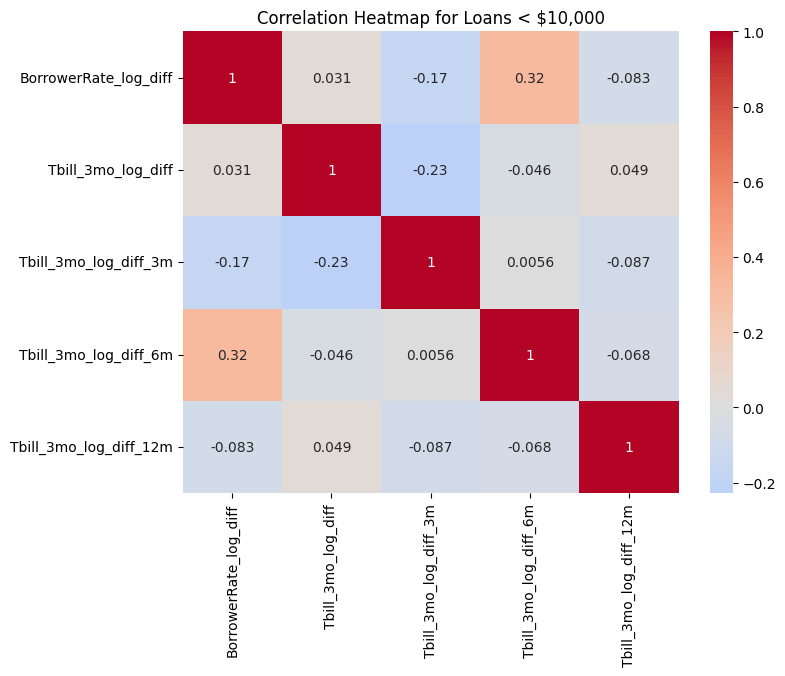

In [42]:
#Repeat for loans less than $10,000
lag_extract2_lt10k = extract2[(extract2['issue_d'] > '2009-04-01') & (extract2['loan_amnt'] < 10000)]
lag_extract2_lt10k = lag_extract2_lt10k.rename(columns={'issue_d':'ListingCreationDate', 'loan_amnt':'LoanOriginalAmount', 'term':'Term', 'int_rate':'BorrowerRate'})
lag_extract1_lt10k = extract1[(extract1['ListingCreationDate'] > '2009-04-01') & (extract1['LoanOriginalAmount'] < 10000)]
combined_lag_lt10k = pd.concat([lag_extract1_lt10k, lag_extract2_lt10k], ignore_index=True)
combined_lag_lt10k = combined_lag_lt10k.sort_values(by='ListingCreationDate').reset_index(drop=True)
# Extract month-year    
combined_lag_lt10k['month'] = combined_lag_lt10k['ListingCreationDate'].dt.to_period('M')
# Group & average
combined_lag_lt10k_grouped = combined_lag_lt10k.groupby('month').mean(numeric_only=True).reset_index()
print(combined_lag_lt10k_grouped.head())
#log differences for loans less than $10,000
combined_lag_lt10k_grouped['BorrowerRate_log_diff'] = np.log(combined_lag_lt10k_grouped['BorrowerRate']) - np.log(combined_lag_lt10k_grouped['BorrowerRate'].shift(1))
combined_lag_lt10k_grouped['Tbill_3mo_log_diff'] = np.log(merged_lag['Tbill_3mo_lag']) - np.log(merged_lag['Tbill_3mo_lag'].shift(1))
combined_lag_lt10k_grouped['Tbill_3mo_log_diff_3m'] = np.log(merged_lag['Tbill_3mo_lag_3m']) - np.log(merged_lag['Tbill_3mo_lag_3m'].shift(1))
combined_lag_lt10k_grouped['Tbill_3mo_log_diff_6m'] = np.log(merged_lag['Tbill_3mo_lag_6m']) - np.log(merged_lag['Tbill_3mo_lag_6m'].shift(1))
combined_lag_lt10k_grouped['Tbill_3mo_log_diff_12m'] = np.log(merged_lag['Tbill_3mo_lag_12m']) - np.log(merged_lag['Tbill_3mo_lag_12m'].shift(1))
#Correlation for loans less than $10,000
correlations_lt10k = combined_lag_lt10k_grouped[['BorrowerRate_log_diff', 'Tbill_3mo_log_diff', 'Tbill_3mo_log_diff_3m', 'Tbill_3mo_log_diff_6m', 'Tbill_3mo_log_diff_12m']].corr()
correlations_lt10k = correlations_lt10k['BorrowerRate_log_diff'].drop('BorrowerRate_log_diff')
print(correlations_lt10k)   
#Heatmap for loans less than $10,000
correlation_matrix_lt10k = combined_lag_lt10k_grouped[['BorrowerRate_log_diff', 'Tbill_3mo_log_diff', 'Tbill_3mo_log_diff_3m', 'Tbill_3mo_log_diff_6m', 'Tbill_3mo_log_diff_12m']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_lt10k, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Loans < $10,000')    
plt.show()

     month  LoanOriginalAmount  BorrowerRate
0  2009-04        10000.000000     15.000000
1  2009-05        13139.139344     12.240984
2  2009-06        12968.253968     12.045714
3  2009-07        12836.842105     12.333750
4  2009-08        12625.818713     12.413684
Tbill_3mo_log_diff        0.043479
Tbill_3mo_log_diff_3m    -0.089841
Tbill_3mo_log_diff_6m     0.183195
Tbill_3mo_log_diff_12m   -0.060254
Name: BorrowerRate_log_diff, dtype: float64


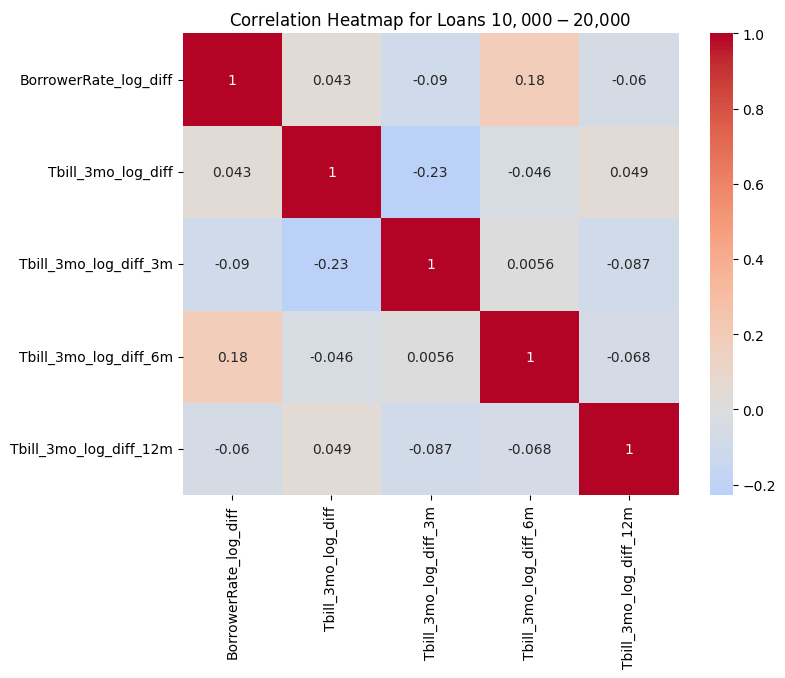

In [43]:
#repeat for loans between $10,000 and $20,000
lag_extract2_10k_20k = extract2[(extract2['issue_d'] > '2009-04-01') & (extract2['loan_amnt'] >= 10000) & (extract2['loan_amnt'] < 20000)]
lag_extract2_10k_20k = lag_extract2_10k_20k.rename(columns={'issue_d':'ListingCreationDate', 'loan_amnt':'LoanOriginalAmount', 'term':'Term', 'int_rate':'BorrowerRate'})
lag_extract1_10k_20k = extract1[(extract1['ListingCreationDate'] > '2009-04-01') & (extract1['LoanOriginalAmount'] >= 10000) & (extract1['LoanOriginalAmount'] < 20000)]
combined_lag_10k_20k = pd.concat([lag_extract1_10k_20k, lag_extract2_10k_20k], ignore_index=True)
combined_lag_10k_20k = combined_lag_10k_20k.sort_values(by='ListingCreationDate').reset_index(drop=True)
# Extract month-year    
combined_lag_10k_20k['month'] = combined_lag_10k_20k['ListingCreationDate'].dt.to_period('M')
# Group & average
combined_lag_10k_20k_grouped = combined_lag_10k_20k.groupby('month').mean(numeric_only=True).reset_index()
print(combined_lag_10k_20k_grouped.head())
#log differences for loans between $10,000 and $20,000
combined_lag_10k_20k_grouped['BorrowerRate_log_diff'] = np.log(combined_lag_10k_20k_grouped['BorrowerRate']) - np.log(combined_lag_10k_20k_grouped['BorrowerRate'].shift(1))
combined_lag_10k_20k_grouped['Tbill_3mo_log_diff'] = np.log(merged_lag['Tbill_3mo_lag']) - np.log(merged_lag['Tbill_3mo_lag'].shift(1))
combined_lag_10k_20k_grouped['Tbill_3mo_log_diff_3m'] = np.log(merged_lag['Tbill_3mo_lag_3m']) - np.log(merged_lag['Tbill_3mo_lag_3m'].shift(1))
combined_lag_10k_20k_grouped['Tbill_3mo_log_diff_6m'] = np.log(merged_lag['Tbill_3mo_lag_6m']) - np.log(merged_lag['Tbill_3mo_lag_6m'].shift(1))
combined_lag_10k_20k_grouped['Tbill_3mo_log_diff_12m'] = np.log(merged_lag['Tbill_3mo_lag_12m']) - np.log(merged_lag['Tbill_3mo_lag_12m'].shift(1))
#Correlation for loans between $10,000 and $20,000
correlations_10k_20k = combined_lag_10k_20k_grouped[['BorrowerRate_log_diff', 'Tbill_3mo_log_diff', 'Tbill_3mo_log_diff_3m', 'Tbill_3mo_log_diff_6m', 'Tbill_3mo_log_diff_12m']].corr()
correlations_10k_20k = correlations_10k_20k['BorrowerRate_log_diff'].drop('BorrowerRate_log_diff')
print(correlations_10k_20k) 
#Heatmap for loans between $10,000 and $20,000
correlation_matrix_10k_20k = combined_lag_10k_20k_grouped[['BorrowerRate_log_diff', 'Tbill_3mo_log_diff', 'Tbill_3mo_log_diff_3m', 'Tbill_3mo_log_diff_6m', 'Tbill_3mo_log_diff_12m']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_10k_20k, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Loans $10,000 - $20,000')
plt.show()

     month  LoanOriginalAmount  BorrowerRate
0  2009-05        22416.129032     13.627097
1  2009-06        21965.000000     13.453000
2  2009-07        22554.605263     13.972632
3  2009-08        20678.125000     13.704821
4  2009-09        20075.757576     14.363788
Tbill_3mo_log_diff        0.046825
Tbill_3mo_log_diff_3m     0.099537
Tbill_3mo_log_diff_6m    -0.019379
Tbill_3mo_log_diff_12m    0.142601
Name: BorrowerRate_log_diff, dtype: float64


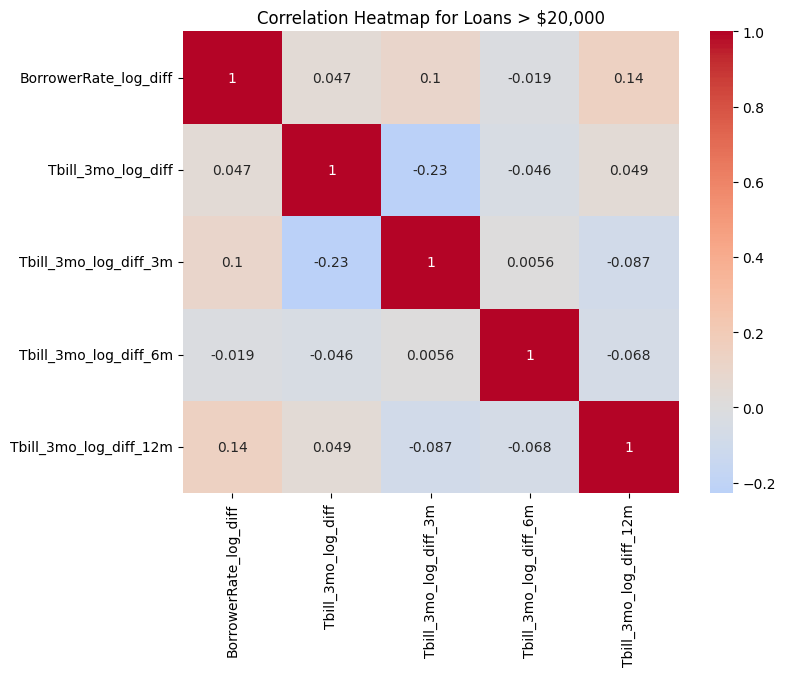

In [44]:
#Repeat for loans larger than $20,000
lag_extract2_gt20k = extract2[(extract2['issue_d'] > '2009-04-01') & (extract2['loan_amnt'] >= 20000)]
lag_extract2_gt20k = lag_extract2_gt20k.rename(columns={'issue_d':'ListingCreationDate', 'loan_amnt':'LoanOriginalAmount', 'term':'Term', 'int_rate':'BorrowerRate'})
lag_extract1_gt20k = extract1[(extract1['ListingCreationDate'] > '2009-04-01') & (extract1['LoanOriginalAmount'] >= 20000)]
combined_lag_gt20k = pd.concat([lag_extract1_gt20k, lag_extract2_gt20k], ignore_index=True)
combined_lag_gt20k = combined_lag_gt20k.sort_values(by='ListingCreationDate').reset_index(drop=True)
# Extract month-year
combined_lag_gt20k['month'] = combined_lag_gt20k['ListingCreationDate'].dt.to_period('M')
# Group & average
combined_lag_gt20k_grouped = combined_lag_gt20k.groupby('month').mean(numeric_only=True).reset_index()
print(combined_lag_gt20k_grouped.head())    
#log differences for loans larger than $20,000
combined_lag_gt20k_grouped['BorrowerRate_log_diff'] = np.log(combined_lag_gt20k_grouped['BorrowerRate']) - np.log(combined_lag_gt20k_grouped['BorrowerRate'].shift(1))
combined_lag_gt20k_grouped['Tbill_3mo_log_diff'] = np.log(merged_lag['Tbill_3mo_lag']) - np.log(merged_lag['Tbill_3mo_lag'].shift(1))
combined_lag_gt20k_grouped['Tbill_3mo_log_diff_3m'] = np.log(merged_lag['Tbill_3mo_lag_3m']) - np.log(merged_lag['Tbill_3mo_lag_3m'].shift(1))
combined_lag_gt20k_grouped['Tbill_3mo_log_diff_6m'] = np.log(merged_lag['Tbill_3mo_lag_6m']) - np.log(merged_lag['Tbill_3mo_lag_6m'].shift(1))
combined_lag_gt20k_grouped['Tbill_3mo_log_diff_12m'] = np.log(merged_lag['Tbill_3mo_lag_12m']) - np.log(merged_lag['Tbill_3mo_lag_12m'].shift(1))
#Correlation for loans larger than $20,000
correlations_gt20k = combined_lag_gt20k_grouped[['BorrowerRate_log_diff', 'Tbill_3mo_log_diff', 'Tbill_3mo_log_diff_3m', 'Tbill_3mo_log_diff_6m', 'Tbill_3mo_log_diff_12m']].corr()
correlations_gt20k = correlations_gt20k['BorrowerRate_log_diff'].drop('BorrowerRate_log_diff')
print(correlations_gt20k)
#Heatmap for loans larger than $20,000
correlation_matrix_gt20k = combined_lag_gt20k_grouped[['BorrowerRate_log_diff', 'Tbill_3mo_log_diff', 'Tbill_3mo_log_diff_3m', 'Tbill_3mo_log_diff_6m', 'Tbill_3mo_log_diff_12m']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_gt20k, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Loans > $20,000')
plt.show()

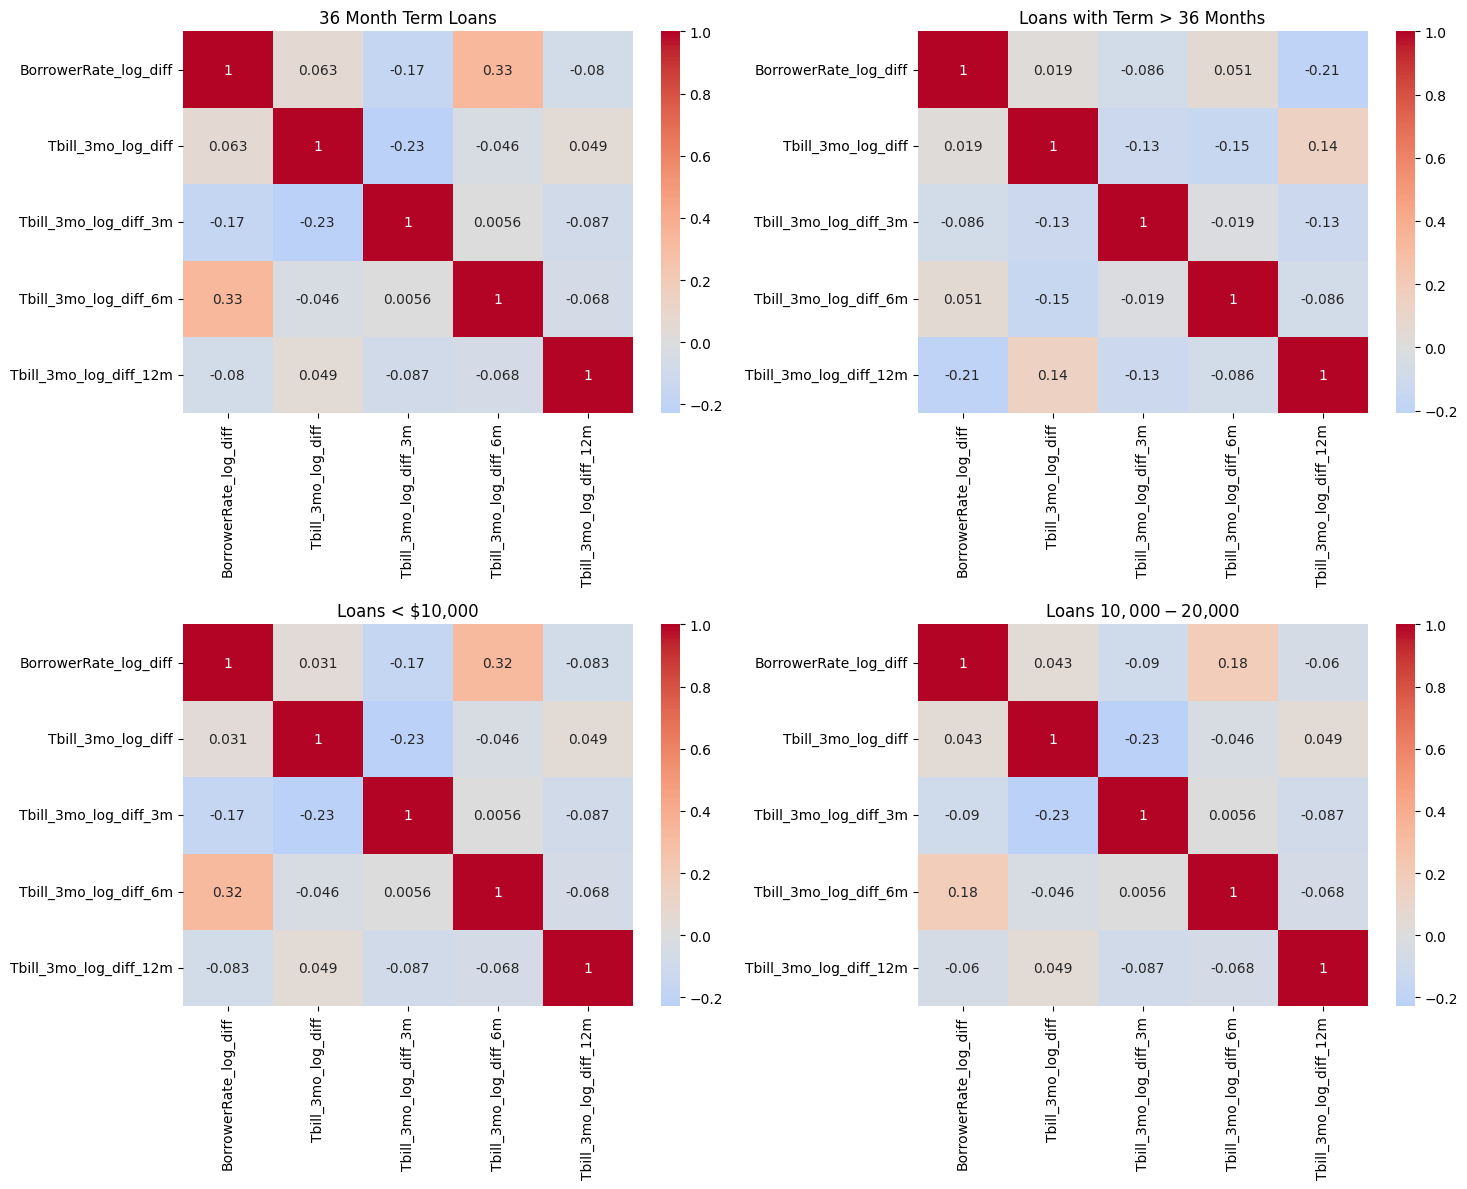

In [45]:
#Combine all heatmaps into one figure for easier comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.heatmap(correlation_matrix_36, annot=True, cmap='coolwarm', center=0, ax=axes[0, 0])
axes[0, 0].set_title('36 Month Term Loans')
sns.heatmap(correlation_matrix_gt36, annot=True, cmap='coolwarm', center=0, ax=axes[0, 1])
axes[0, 1].set_title('Loans with Term > 36 Months')
sns.heatmap(correlation_matrix_lt10k, annot=True, cmap='coolwarm', center=0, ax=axes[1, 0])
axes[1, 0].set_title('Loans < $10,000')
sns.heatmap(correlation_matrix_10k_20k, annot=True, cmap='coolwarm', center=0, ax=axes[1, 1])
axes[1, 1].set_title('Loans $10,000 - $20,000')
plt.tight_layout()
plt.show()

Basic Linear Regression

                              OLS Regression Results                             
Dep. Variable:     BorrowerRate_log_diff   R-squared:                       0.145
Model:                               OLS   Adj. R-squared:                  0.106
Method:                    Least Squares   F-statistic:                     3.684
Date:                   Tue, 17 Feb 2026   Prob (F-statistic):            0.00808
Time:                           16:47:17   Log-Likelihood:                 146.43
No. Observations:                     92   AIC:                            -282.9
Df Residuals:                         87   BIC:                            -270.3
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

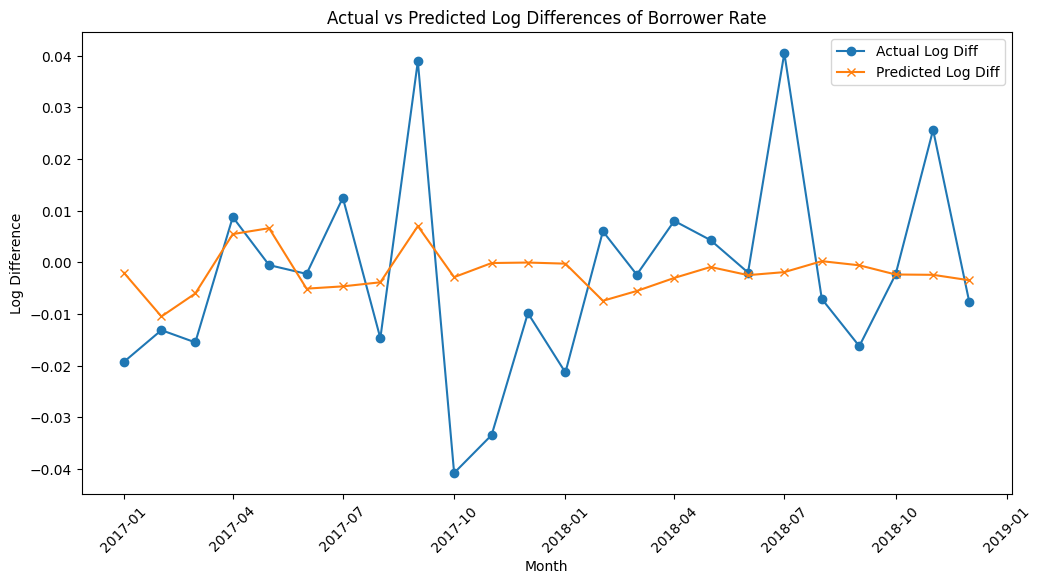

In [46]:
#Regress on lagged T-bill rates to see if they have predictive power on borrower rates
import statsmodels.api as sm
#Split into a train/test set with regard to time; only 80% of the data in the training set to ensure we have enough data in the test set to evaluate predictive power
train_size = int(len(merged_lag) * 0.80)
train = merged_lag.iloc[:train_size]
test = merged_lag.iloc[train_size:]
#Define features and target
X_train = train[['Tbill_3mo_log_diff', 'Tbill_3mo_log_diff_3m', 'Tbill_3mo_log_diff_6m', 'Tbill_3mo_log_diff_12m']]
y_train = train['BorrowerRate_log_diff']
X_test = test[['Tbill_3mo_log_diff', 'Tbill_3mo_log_diff_3m', 'Tbill_3mo_log_diff_6m', 'Tbill_3mo_log_diff_12m']]
y_test = test['BorrowerRate_log_diff']
#Add constant for intercept
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
#Drop any rows with NaN values that may have been introduced by log differencing
train_data = pd.concat([X_train_const, y_train], axis=1).dropna()
X_train_const = train_data.drop('BorrowerRate_log_diff', axis=1)
y_train = train_data['BorrowerRate_log_diff']
test_data = pd.concat([X_test_const, y_test], axis=1).dropna()
X_test_const = test_data.drop('BorrowerRate_log_diff', axis=1)
y_test = test_data['BorrowerRate_log_diff']
#Fit OLS regression
model = sm.OLS(y_train, X_train_const).fit()
print(model.summary())
#Predict on test set
y_pred = model.predict(X_test_const)
#Evaluate predictive power using R-squared and RMSE
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('R-squared on test set:', r2)
print('RMSE on test set:', rmse)
#Graph actual vs predicted log differences
plt.figure(figsize=(12, 6))
plt.plot(test['month'], y_test, label='Actual Log Diff', marker='o')
plt.plot(test['month'], y_pred, label='Predicted Log Diff', marker='x')
plt.title('Actual vs Predicted Log Differences of Borrower Rate')
plt.xlabel('Month')
plt.ylabel('Log Difference')
plt.xticks(rotation=45)
plt.legend()
plt.show()


                              OLS Regression Results                             
Dep. Variable:     BorrowerRate_log_diff   R-squared:                       0.137
Model:                               OLS   Adj. R-squared:                  0.097
Method:                    Least Squares   F-statistic:                     3.444
Date:                   Tue, 17 Feb 2026   Prob (F-statistic):             0.0116
Time:                           16:47:17   Log-Likelihood:                 133.60
No. Observations:                     92   AIC:                            -257.2
Df Residuals:                         87   BIC:                            -244.6
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

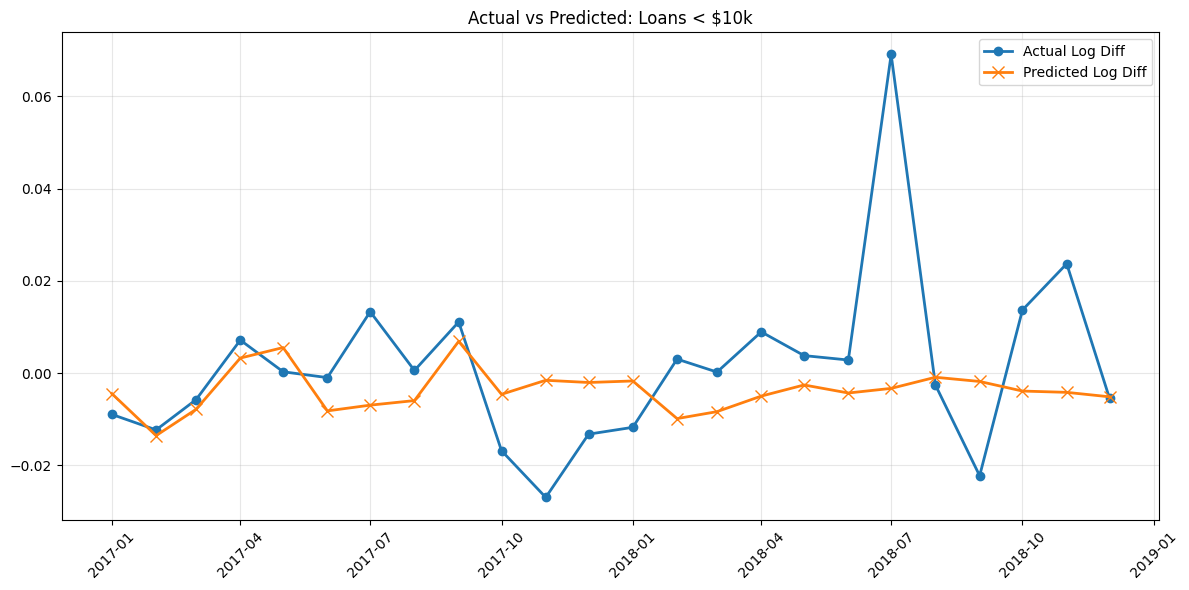

In [47]:
#Repeat for loans less than $10,000
#Split into a train/test set with regard to time; only 80% of the data in the training set to ensure we have enough data in the test set to evaluate predictive power
train_size_lt10k = int(len(combined_lag_lt10k_grouped) * 0.80)
train_lt10k = combined_lag_lt10k_grouped.iloc[:train_size_lt10k]
test_lt10k = combined_lag_lt10k_grouped.iloc[train_size_lt10k:]
#Define features and target
X_train_lt10k = train_lt10k[['Tbill_3mo_log_diff', 'Tbill_3mo_log_diff_3m', 'Tbill_3mo_log_diff_6m', 'Tbill_3mo_log_diff_12m']]
y_train_lt10k = train_lt10k['BorrowerRate_log_diff']
X_test_lt10k = test_lt10k[['Tbill_3mo_log_diff', 'Tbill_3mo_log_diff_3m', 'Tbill_3mo_log_diff_6m', 'Tbill_3mo_log_diff_12m']]
y_test_lt10k = test_lt10k['BorrowerRate_log_diff']
#Add constant for intercept
X_train_lt10k_const = sm.add_constant(X_train_lt10k)
X_test_lt10k_const = sm.add_constant(X_test_lt10k)
#Drop any rows with NaN values that may have been introduced by log differencing
X_train_lt10k_const = X_train_lt10k_const.dropna()
y_train_lt10k = y_train_lt10k.loc[X_train_lt10k_const.index]
X_test_lt10k_const = X_test_lt10k_const.dropna()
y_test_lt10k = y_test_lt10k.loc[X_test_lt10k_const.index]
#Fit OLS regression
model_lt10k = sm.OLS(y_train_lt10k, X_train_lt10k_const).fit()
print(model_lt10k.summary())
#Predict on test set
y_pred_lt10k = model_lt10k.predict(X_test_lt10k_const)
#Evaluate predictive power using R-squared and RMSE
r2_lt10k = r2_score(y_test_lt10k, y_pred_lt10k)
rmse_lt10k = np.sqrt(mean_squared_error(y_test_lt10k, y_pred_lt10k))
print('R-squared on test set for loans < $10,000:', r2_lt10k)
print('RMSE on test set for loans < $10,000:', rmse_lt10k)
#Graph actual vs predicted log differences
fig, ax = plt.subplots(figsize=(12, 6))
x_plot = pd.to_datetime(test_lt10k['month'].astype(str), errors='coerce').ffill()
ax.plot(x_plot, y_test_lt10k, 'o-', label='Actual Log Diff', linewidth=2)
ax.plot(x_plot, y_pred_lt10k, 'x-', label='Predicted Log Diff', linewidth=2, markersize=8)
ax.set_title('Actual vs Predicted: Loans < $10k')
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


                              OLS Regression Results                             
Dep. Variable:     BorrowerRate_log_diff   R-squared:                       0.150
Model:                               OLS   Adj. R-squared:                  0.111
Method:                    Least Squares   F-statistic:                     3.828
Date:                   Tue, 17 Feb 2026   Prob (F-statistic):            0.00650
Time:                           16:47:17   Log-Likelihood:                 146.61
No. Observations:                     92   AIC:                            -283.2
Df Residuals:                         87   BIC:                            -270.6
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

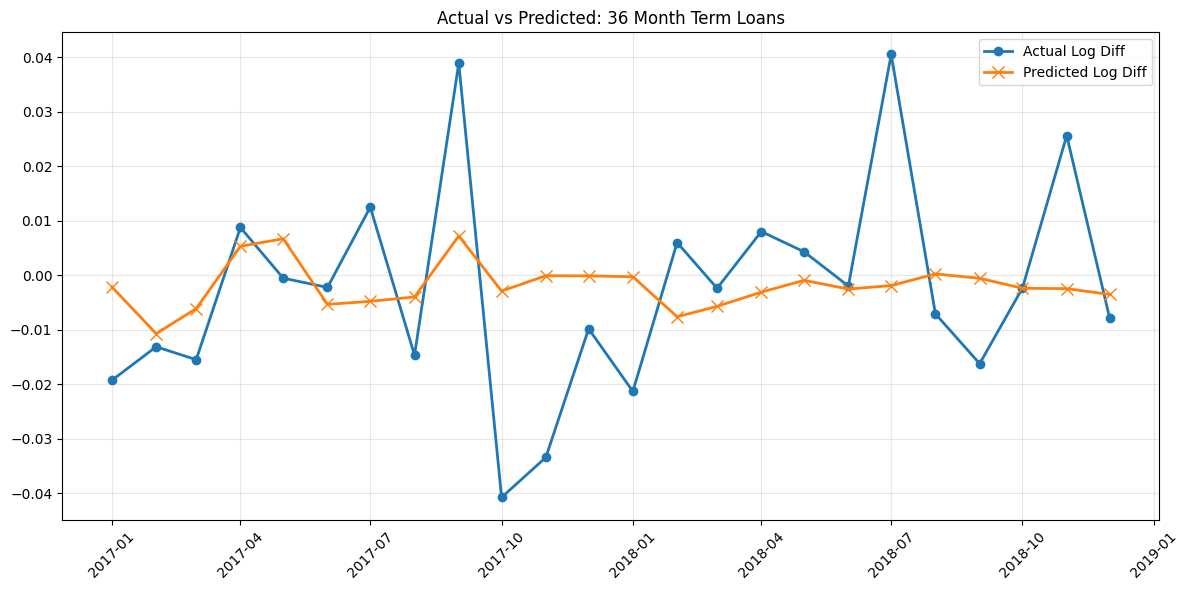

In [48]:
#Repeat for 36 month term loans
#Split into a train/test set with regard to time; only 80% of the data
train_size_36 = int(len(combined_lag_36_grouped) * 0.80)
train_36 = combined_lag_36_grouped.iloc[:train_size_36]
test_36 = combined_lag_36_grouped.iloc[train_size_36:]
#Define features and target
X_train_36 = train_36[['Tbill_3mo_log_diff', 'Tbill_3mo_log_diff_3m', 'Tbill_3mo_log_diff_6m', 'Tbill_3mo_log_diff_12m']]
y_train_36 = train_36['BorrowerRate_log_diff']
X_test_36 = test_36[['Tbill_3mo_log_diff', 'Tbill_3mo_log_diff_3m', 'Tbill_3mo_log_diff_6m', 'Tbill_3mo_log_diff_12m']]
y_test_36 = test_36['BorrowerRate_log_diff']
#Add constant for intercept
X_train_36_const = sm.add_constant(X_train_36)
X_test_36_const = sm.add_constant(X_test_36)
#Drop any rows with NaN values that may have been introduced by log differencing
X_train_36_const = X_train_36_const.dropna()
y_train_36 = y_train_36.loc[X_train_36_const.index]
X_test_36_const = X_test_36_const.dropna()
y_test_36 = y_test_36.loc[X_test_36_const.index]
#Fit OLS regression
model_36 = sm.OLS(y_train_36, X_train_36_const).fit()
print(model_36.summary())
#Predict on test set
y_pred_36 = model_36.predict(X_test_36_const)
#Evaluate predictive power using R-squared and RMSE
r2_36 = r2_score(y_test_36, y_pred_36)
rmse_36 = np.sqrt(mean_squared_error(y_test_36, y_pred_36))
print('R-squared on test set for 36 month term loans:', r2_36)
print('RMSE on test set for 36 month term loans:', rmse_36)
#Graph actual vs predicted log differences
fig, ax = plt.subplots(figsize=(12, 6))
x_plot = pd.to_datetime(test_36['month'].astype(str), errors='coerce').ffill()
ax.plot(x_plot, y_test_36, 'o-', label='Actual Log Diff', linewidth=2)
ax.plot(x_plot, y_pred_36, 'x-', label='Predicted Log Diff', linewidth=2, markersize=8)
ax.set_title('Actual vs Predicted: 36 Month Term Loans')
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


                              OLS Regression Results                             
Dep. Variable:     BorrowerRate_log_diff   R-squared:                       0.110
Model:                               OLS   Adj. R-squared:                 -0.017
Method:                    Least Squares   F-statistic:                    0.8665
Date:                   Tue, 17 Feb 2026   Prob (F-statistic):              0.496
Time:                           16:47:18   Log-Likelihood:                 46.155
No. Observations:                     33   AIC:                            -82.31
Df Residuals:                         28   BIC:                            -74.83
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

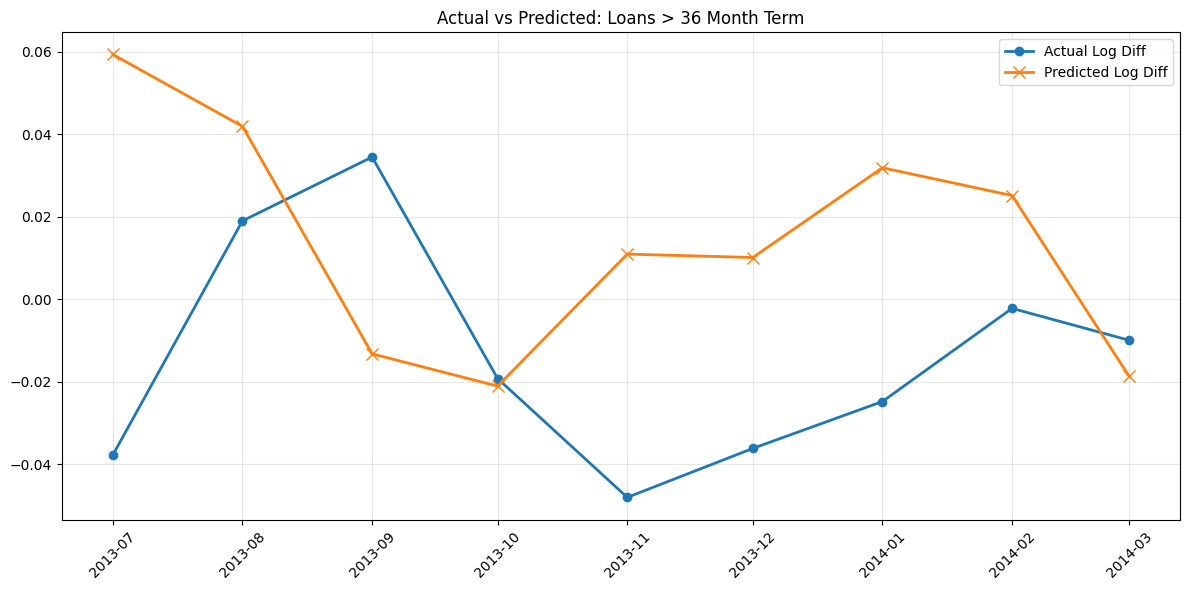

In [49]:
#repeat for loans greater than 36 month term loans
#Split into a train/test set with regard to time; only 80% of the data
train_size_gt36 = int(len(combined_lag_gt36_grouped) * 0.80)
train_gt36 = combined_lag_gt36_grouped.iloc[:train_size_gt36]
test_gt36 = combined_lag_gt36_grouped.iloc[train_size_gt36:]
#Define features and target
X_train_gt36 = train_gt36[['Tbill_3mo_log_diff', 'Tbill_3mo_log_diff_3m', 'Tbill_3mo_log_diff_6m', 'Tbill_3mo_log_diff_12m']]
y_train_gt36 = train_gt36['BorrowerRate_log_diff']
X_test_gt36 = test_gt36[['Tbill_3mo_log_diff', 'Tbill_3mo_log_diff_3m', 'Tbill_3mo_log_diff_6m', 'Tbill_3mo_log_diff_12m']]
y_test_gt36 = test_gt36['BorrowerRate_log_diff']
#Add constant for intercept
X_train_gt36_const = sm.add_constant(X_train_gt36)
X_test_gt36_const = sm.add_constant(X_test_gt36)
#Drop any rows with NaN values that may have been introduced by log differencing
X_train_gt36_const = X_train_gt36_const.dropna()
X_test_gt36_const = X_test_gt36_const.dropna()
y_train_gt36 = y_train_gt36.loc[X_train_gt36_const.index]
y_test_gt36 = y_test_gt36.loc[X_test_gt36_const.index]
#Fit OLS regression
model_gt36 = sm.OLS(y_train_gt36, X_train_gt36_const).fit()
print(model_gt36.summary())
#Predict on test set
y_pred_gt36 = model_gt36.predict(X_test_gt36_const)
#Evaluate predictive power using R-squared and RMSE
r2_gt36 = r2_score(y_test_gt36, y_pred_gt36)
rmse_gt36 = np.sqrt(mean_squared_error(y_test_gt36, y_pred_gt36))
print('R-squared on test set for loans > 36 month term:', r2_gt36)
print('RMSE on test set for loans > 36 month term:', rmse_gt36)
#Graph actual vs predicted log differences
fig, ax = plt.subplots(figsize=(12, 6))
x_plot = pd.to_datetime(test_gt36['month'].astype(str), errors='coerce').ffill()
ax.plot(x_plot, y_test_gt36, 'o-', label='Actual Log Diff', linewidth=2)
ax.plot(x_plot, y_pred_gt36, 'x-', label='Predicted Log Diff', linewidth=2, markersize=8)
ax.set_title('Actual vs Predicted: Loans > 36 Month Term')
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()